# Compare phase estimation methods on hippocampal theta oscillations

In [2]:
import numpy as np
import scipy as sp

%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt

# Load data

In [29]:
x = np.load('/gh/data2/hc3/npy/gor01/2006-6-7_16-40-19/10/lfp_0.npy')
x = x[10000:30000]
Fs = 1252

# Preprocess data

In [30]:
cflow = 50
Ntapslow = 501
cfhigh = 1
Ntapshigh = 1001

from misshapen import nonshape
x = nonshape.highpass_default(x, Fs, cfhigh, Ntapshigh)
x = nonshape.lowpass_default(x, Fs, cflow, Ntapslow)

# Compute phase time series

### Bandpass + hilbert

In [31]:
f_range = (4,10)
x_filt, _ = nonshape.bandpass_default(x, f_range, Fs, rmv_edge=False)
pha_h = np.angle(sp.signal.hilbert(x_filt))

### Peak and trough interpolation

In [32]:
Ps, Ts = nonshape.findpt(x, f_range, Fs)
pha_pt = nonshape.wfpha(x, Ps, Ts)

# Compare phase time series

(1, 3)

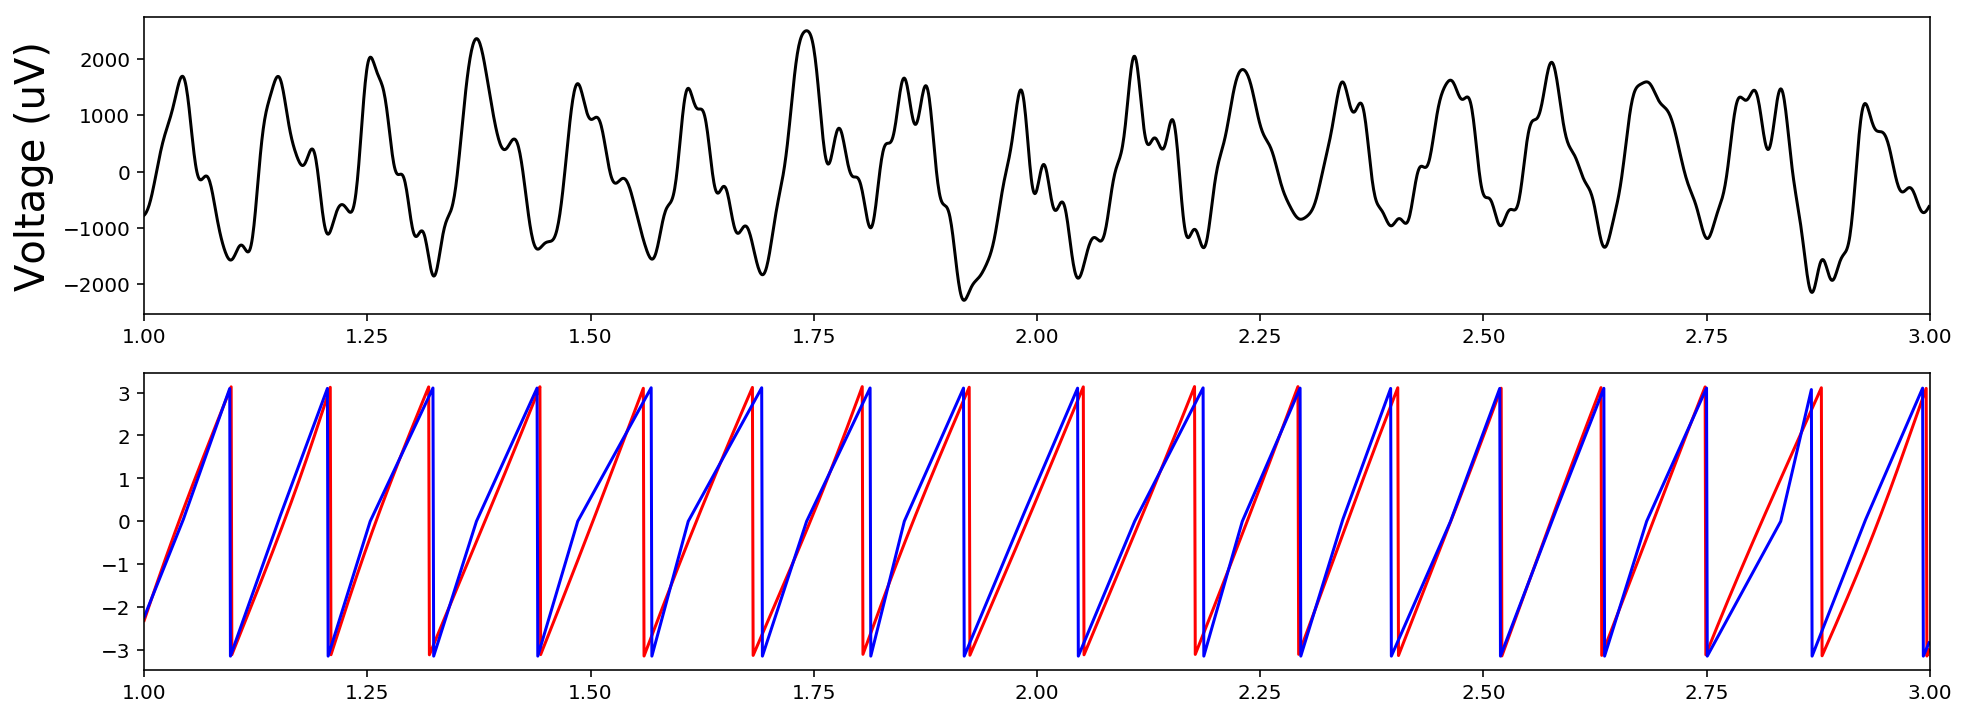

In [38]:
t = np.arange(0,len(x)/Fs, 1/Fs)
tlims = [1,3]
samps = np.logical_and(t>=tlims[0],t<tlims[1])

plt.figure(figsize=(16,6))
plt.subplot(2,1,1)
plt.plot(t[samps],x[samps],'k')
plt.xlim(tlims)
plt.ylabel('Voltage (uV)',size=20)
plt.subplot(2,1,2)
plt.plot(t[samps],pha_h[samps],'r',label='Hilbert')
plt.plot(t[samps],pha_pt[samps],'b',label='waveform')
plt.xlim(tlims)